In [48]:
#import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'README.md',
 'time_series_2019-ncov-Confirmed.csv',
 'Data_Preprocess.ipynb']

In [4]:
data = pd.read_csv('time_series_2019-ncov-Confirmed.csv', index_col='Country/Region')

In [5]:
data.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,...,75,82,114,147,177,212,272,322,411,599
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,...,701,773,839,825,878,889,924,963,1007,1086
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,...,200,212,226,243,266,313,345,385,432,455
Nepal,NaN,28.1667,84.2500,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
Malaysia,NaN,2.5000,112.5000,0,0,0,3,4,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
data.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [7]:
def check70(arr):
    arr = list(arr)
    l = len(arr)
    c = 0
    for i in arr:
        if (i<= 0):
            c+= 1
    
    
    if (c/l*100) < 70:
        return 0
    else:
        return 1

In [8]:
check70(data['3/22/20'])

0

In [9]:
# More than 70% dropped
for i in data.columns[4:]:
    if(check70(data[i])) == 1:
        data.drop(i,axis = 1,inplace = True)
    

In [10]:
data.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [11]:
data.drop('Province/State',axis = 1, inplace = True)
data.head()

,Lat,Long,1/22/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,15.0000,101.0000,2,43,47,48,50,50,50,53,...,75,82,114,147,177,212,272,322,411,599
Japan,36.0000,138.0000,2,331,360,420,461,502,511,581,...,701,773,839,825,878,889,924,963,1007,1086
Singapore,1.2833,103.8333,0,110,117,130,138,150,150,160,...,200,212,226,243,266,313,345,385,432,455
Nepal,28.1667,84.2500,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
Malaysia,2.5000,112.5000,0,50,50,83,93,99,117,129,...,197,238,428,566,673,790,900,1030,1183,1306


In [12]:
data.shape

(487, 22)

## Country Wise Plot:
### Enter Country name

Enter the Name of the Country(first letter should be upper case): 
Example:['Singapore' 'Nepal' 'Malaysia'] 
Enter Here : India


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

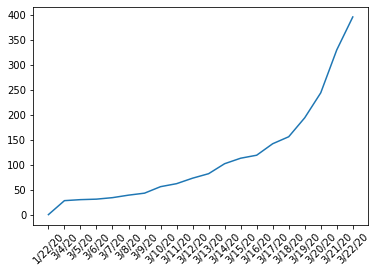

In [44]:
# Country Wise Plot

print("Enter the Name of the Country(first letter should be upper case): ")
print(f"Example:{data.index[2:5].values} ")
c_name = input("Enter Here : ")
j = data.loc[c_name][2:]
plt.plot(j.index, j)
plt.xticks(rotation = 45)

In [16]:
data.head()

,Lat,Long,1/22/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,15.0000,101.0000,2,43,47,48,50,50,50,53,...,75,82,114,147,177,212,272,322,411,599
Japan,36.0000,138.0000,2,331,360,420,461,502,511,581,...,701,773,839,825,878,889,924,963,1007,1086
Singapore,1.2833,103.8333,0,110,117,130,138,150,150,160,...,200,212,226,243,266,313,345,385,432,455
Nepal,28.1667,84.2500,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
Malaysia,2.5000,112.5000,0,50,50,83,93,99,117,129,...,197,238,428,566,673,790,900,1030,1183,1306


In [35]:
d = {}
for i in data.columns[2:]:
    d[i] = np.sum(data[i])
d

{'1/22/20': 555,
 '3/4/20': 95120,
 '3/5/20': 97882,
 '3/6/20': 101784,
 '3/7/20': 105821,
 '3/8/20': 109795,
 '3/9/20': 113561,
 '3/10/20': 118592,
 '3/11/20': 125865,
 '3/12/20': 128343,
 '3/13/20': 145193,
 '3/14/20': 156094,
 '3/15/20': 167446,
 '3/16/20': 181527,
 '3/17/20': 197142,
 '3/18/20': 214910,
 '3/19/20': 242708,
 '3/20/20': 272166,
 '3/21/20': 304524,
 '3/22/20': 335955}

## Date Wise Plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

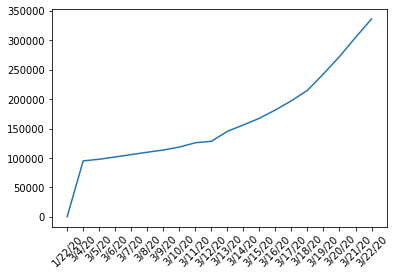

In [43]:
plt.plot([i for i in d.keys()], [i for i in d.values()])
plt.xticks(rotation = 45)

In [50]:
europe = list(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
               'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
               'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
               'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia'])

